This notebook provides practice problems associated with lesson 2. It is divided into several parts:
* **Part 1** - most approachable place to start.  Practices syntax and concepts
* **Part 2** - a step up from part 1.  Integrates concepts from accross the lesson in more applied scenarios

In [1]:
# Import the libary.  You only have to do this once per file.
import pandas as pd

# Practice Problems Part 1

## `pandas` Data Structures

1. Use `pd.Dataframe()` to convert the following dictionary into a pandas Dataframe.  Assign it to a variable called `earthquake_df`.

In [2]:
earthquakes_dict = {
    'magnitude': [3.2, 2.6, 5.4, 6.0, 6.0, 4.5, 4.2], 
    'depth (km)': [6, 5, 3, 15, 14, 10, 8],
    'region': ['California', 'Philippines', 'Philippines', 'Indonesia', 'California', 'California', 'California']
}

In [3]:
earthquake_df = pd.DataFrame(earthquakes_dict)

2. Print just the Depth column from the dataframe.  What is the data type of that that subset of data?

In [4]:
earthquake_df['depth (km)']

0     6
1     5
2     3
3    15
4    14
5    10
6     8
Name: depth (km), dtype: int64

Check your answer using `type()`

In [5]:
# Example
type(earthquake_df)  # Put your answer to #2 in place of `earthquake_df`

pandas.core.frame.DataFrame

## Accessing values in Dataframes

In [6]:
earthquake_df

,magnitude,depth (km),region
0,3.2,6,California
1,2.6,5,Philippines
2,5.4,3,Philippines
3,6.0,15,Indonesia
4,6.0,14,California
5,4.5,10,California
6,4.2,8,California


3. print out the first row in the earthquakes dataframe

4. print out the 2nd-5th rows in the earthquakes dataframe

5. take the 2nd and 3rd rows of the earthquakes dataframe and assign them to a variables called `philippeans_only`

6. What is the data type of the new `pilippeans_only` variable?

## Inspecting and Aggregations

7. Use `.info()` to look up the data type of each of the columns in the dataframe

In [7]:
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   magnitude   7 non-null      float64
 1   depth (km)  7 non-null      int64  
 2   region      7 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


In [8]:
# magnitude -> float, depth -> int, region -> object

_Note: An "object" data type isn't one we have talked about before because it is specific to pandas.  Pandas uses "object" as a datatype that is usually strings, but also includes any kind of mixed datatypes.  Generally I just consider "object" datatype in pandas to mean "string", since that is the most common case._

8. What is:

* the strongest earthquake that is listed in this dataset (highest magnitude)?
* the mean depth of these earthquakes?

In [9]:
earthquake_df.describe()

,magnitude,depth (km)
count,7.000000,7.000000
mean,4.557143,8.714286
std,1.333988,4.535574
min,2.600000,3.000000
25%,3.700000,5.500000
50%,4.500000,8.000000
75%,5.700000,12.000000
max,6.000000,15.000000


9. Googling practice: Find the number of earthquakes that each of the regions in the dataframe had.  

In other words answer the question, "how many earthquakes occured in California?", "how many earthquakes occured in the phillipeans?", etc.

In [10]:
earthquake_df['region'].value_counts()

California     4
Philippines    2
Indonesia      1
Name: region, dtype: int64


If you're looking for a place to start googling, try the phrase: "pandas dataframe number of occurances of a value".

_**Hint** Check out [this](https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/) piece of the internet_

# Practice Problems Part 2

Please run the following cells to have access to the sample USGS data before you start the practice problems.

In [11]:
# Read in the data
water_vars = pd.read_csv('./data/englewood_3_12_21_usgs_water.tsv', sep='\t', skiprows=30)
# There are a lot of variables here, so let's shorten our dataframe to a few variables
water_vars = water_vars[['datetime', '210920_00060', '210922_00010', '210924_00300', '210925_00400']]
# Get rid of the first row of hard-coded datatype info
water_vars = water_vars.drop(0)
# Rename the columns from their USGS codes to more human-readible names
name_codes = {'210920_00060': 'discharge','210922_00010': 'temperature (C)', '210924_00300': 'dissolved oxygen', '210925_00400': 'pH'}
water_vars = water_vars.rename(columns=name_codes)
# Convert all numeric columns to the proper datatype
numeric_cols = water_vars.columns.drop('datetime')
water_vars[numeric_cols] = water_vars[numeric_cols].apply(pd.to_numeric)

In [12]:
water_vars

,datetime,discharge,temperature (C),dissolved oxygen,pH
1,2021-03-12 00:00,44.5,8.1,8.3,8.1
2,2021-03-12 00:15,44.5,8.1,8.2,8.1
3,2021-03-12 00:30,44.5,8.1,8.2,8.1
4,2021-03-12 00:45,44.5,8.1,8.1,8.1
5,2021-03-12 01:00,44.5,8.1,8.1,8.1
...,...,...,...,...,...
142,2021-03-13 11:15,42.6,6.7,9.8,7.9
143,2021-03-13 11:30,42.6,6.7,9.9,7.9
144,2021-03-13 11:45,42.6,6.7,10.2,7.9
145,2021-03-13 12:00,46.5,6.7,10.3,7.9


#### Question 1

**A)** Return the mean of all the columns

**B)** Return the mean of just the dissolved oxygen column

**C**) Return the total discharge from the full dataframe

**D)** Return the mean values of all the columns for the first 15 rows

#### Question 2

Just like with dictionaries, the syntax for viewing a key (in dictionary)/column (in dataframe) is very similar to the syntax for creating a new key/column.

In [13]:
# Example: View a column
water_vars['temperature (C)']

1      8.1
2      8.1
3      8.1
4      8.1
5      8.1
      ... 
142    6.7
143    6.7
144    6.7
145    6.7
146    6.6
Name: temperature (C), Length: 146, dtype: float64

In [14]:
# Example: Assign a column (Set all the values to 6)
water_vars['temperature'] = 6

Create a new temperature column which is the the temperature of the water in farenheit.  Calculate the farenheit temperature using the celsius temperature in the `temperature (C)` column.

#### Question 3

NaN values are an inevitable part of life when working with real data and its important to always be aware of them.

**A)** Use the function `.isnull()` to create a table full off Boolean values, indicating if that value is NaN or not

_[`.isnull()` doc page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull)_

In [15]:
# Run this line to make sure you will be able to see more rows in the output
pd.set_option('display.min_rows', 40)

In [16]:
water_vars.isnull()

,datetime,discharge,temperature (C),dissolved oxygen,pH,temperature
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False
10,False,False,False,False,False,False


In [17]:
# Run this line after this problem if you'd like to reset your output display
pd.set_option('display.min_rows', 10)

**B)** Use the [`.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method to replace all of the columns that have any NaN values.  (_That will require an argument in the function._)

**C)** Drop any rows that have NaN values.  Assign that dataframe to a new variable called `water_vars_nonan`.

**D)** Replace all of the NaN values in this dataframe with a different value to indicate NaN: -999.

_Google hint: try "pandas dataframe replace null values"_

_Stronger hint: [here's a page](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/)_

(After completing this problem please re-run the original data import cells at the top of Part 2 to set your data back to using NaNs.)

#### Question 4

Sort the rows in the dataframe by discharge, with the largest discharge on the top (descending order).  

In [18]:
water_vars.sort_values(by='discharge', ascending=False)

,datetime,discharge,temperature (C),dissolved oxygen,pH,temperature
30,2021-03-12 07:15,48.5,6.9,8.2,7.9,6
26,2021-03-12 06:15,48.5,7.1,8.1,8.0,6
23,2021-03-12 05:30,48.5,7.3,8.1,8.0,6
24,2021-03-12 05:45,48.5,7.3,8.1,8.0,6
34,2021-03-12 08:15,48.5,6.7,8.4,7.9,6
...,...,...,...,...,...,...
62,2021-03-12 15:15,39.0,8.4,13.0,8.2,6
60,2021-03-12 14:45,39.0,8.3,12.8,8.2,6
59,2021-03-12 14:30,39.0,8.1,12.7,8.2,6
61,2021-03-12 15:00,39.0,8.4,12.9,8.2,6


_Google support: "pandas sort values" search.  Or, [this stackoverflow article](https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column) would be helpful, the second answer in particular._

#### Question 5

Before doing question 5 run the following lines of code.  This will format our data a little nicer for this problem.

In [19]:
# Set a new index.  Instead of integers 0+, use the datetime instead
water_vars = water_vars.set_index(pd.to_datetime(water_vars['datetime']))
# Drop the old datetime column
water_vars = water_vars.drop(columns='datetime')

**A)** While there isn't a lot of control in it, we can use the dataframe method `.plot()` to make quick plots of our data.  This isn't the way you would make plots for presentations, but it can still be useful sometimes to help us get a sense of our data.

Try ising the `.plot()` method on the dataframe to make a quick plot. (Example: `forecast.plot()`, where `forecast` is the dataframe)

<AxesSubplot:xlabel='datetime'>

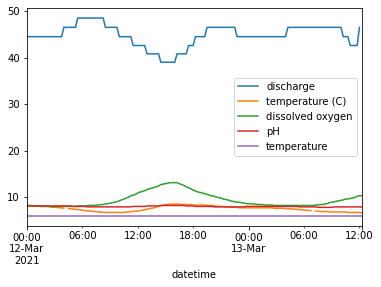

In [20]:
water_vars.plot()

**B)** `.plot()` also works on a single Series.  Try making a plot for just the disolved oxygen variable.

<AxesSubplot:xlabel='datetime'>

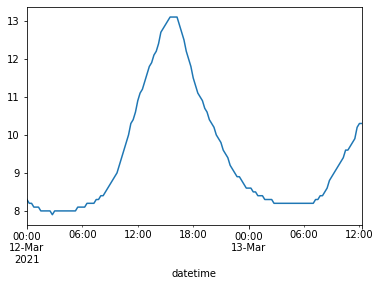

In [21]:
water_vars['dissolved oxygen'].plot()

**C)** Looking at the first plot of all the variables we can see that discharge values are so high it shifts the graph so the other variables can't be seen as well.

Create a plot that shows all the variables except for discharge.  You can use the following line of code, which I used in the data cleaning lines for this problem, as a guide for dropping a single column from a dataframe:

```
# Droppping a single column, "datetime" from the water_vars dataframe
water_vars.drop(columns='datetime')
```

<AxesSubplot:xlabel='datetime'>

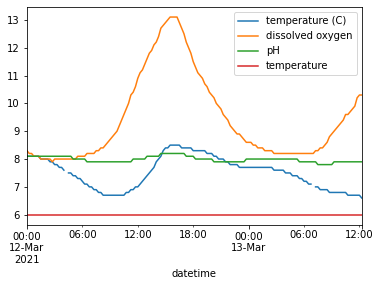

In [22]:
water_vars.drop(columns='discharge').plot()